---
##### ***Name : Ashuwin P***
##### ***Register No : 3122 22 5002 013***
##### ***Course : UIT2721 Deep Learning Concepts and Architectures***
##### ***Exercise : 5***
##### ***Dataset : OCT2017 (50%)***
---

In [1]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import optimizers
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

In [3]:
train_dir     = '../OCT2017/train/'
test_dir      = '../OCT2017/test/'

In [4]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(299, 299), \
                                                    batch_size=128, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(299, 299), \
                                                    batch_size=128, class_mode='categorical')

Found 12022 images belonging to 2 classes.
Found 242 images belonging to 2 classes.


In [5]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)
# Get the output layer from the pre-trained Inception V3 model
x = base_model.output

In [6]:
# Now, add new layers that will be trained with our data
# These layers will be randomly initialized
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

In [7]:
# Get the final Model to train
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
# Freeze the layers from the original base model so that we don't update the weights
for layer in base_model.layers:
    layer.trainable = False

In [9]:
adam = optimizers.Adam(learning_rate=0.001)

In [10]:
# Compile the new model
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Fit the data and output the history
history = model.fit(train_generator, verbose=1, steps_per_epoch=len(train_generator), epochs=5, \
 validation_data=test_generator, validation_steps=len(test_generator))


d:\SEM7\UIT2721 Deep Learning\Lab\dl\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 329s 3s/step - accuracy: 0.8490 - loss: 0.3464 - val_accuracy: 0.9545 - val_loss: 0.1247
Epoch 2/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 489s 5s/step - accuracy: 0.9111 - loss: 0.2239 - val_accuracy: 0.9669 - val_loss: 0.1015
Epoch 3/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.9204 - loss: 0.2025 - val_accuracy: 0.9669 - val_loss: 0.0938
Epoch 4/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.9270 - loss: 0.1840 - val_accuracy: 0.9752 - val_loss: 0.0855
Epoch 5/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 288s 3s/step - accuracy: 0.9241 - loss: 0.1937 - val_accuracy: 0.9711 - val_loss: 0.0852


In [19]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.title('Training and validation accuracy')
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', color='red', label='Validation acc')
    plt.legend()
    plt.show()

    plt.figure()
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', color='red', label='Validation loss')
    plt.legend()
    plt.show()
    return acc, val_acc, loss, val_loss

C:\Users\ashuw\AppData\Local\Temp\ipykernel_2628\2711760573.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', color='red', label='Validation acc')


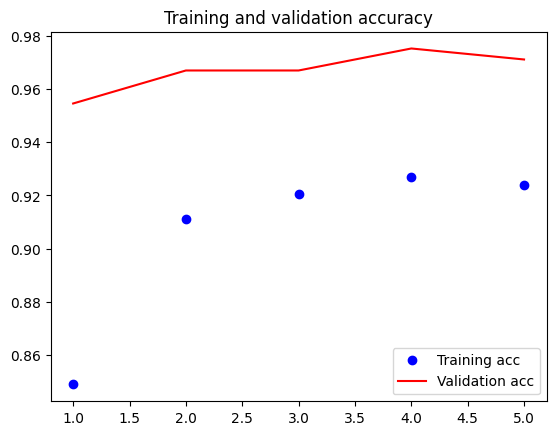

C:\Users\ashuw\AppData\Local\Temp\ipykernel_2628\2711760573.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', color='red', label='Validation loss')


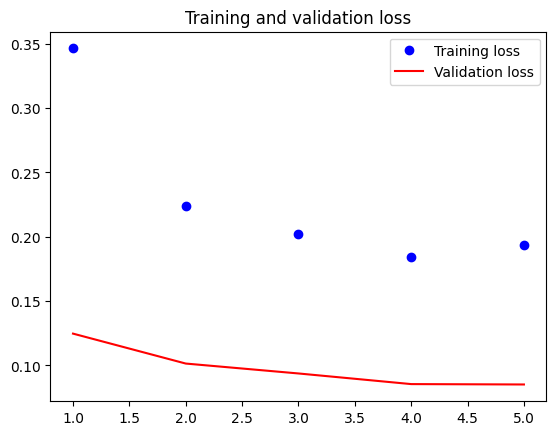

In [20]:
acc, val_acc, loss, val_loss = plot_history(history)

In [21]:
model.save("oct_inception_model.h5") 